In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('../../Datasets/INTC Historical Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,36.60,36.61,36.93,36.27,20.20M,0.91%
1,1/4/2017,36.41,36.71,36.77,36.34,15.92M,-0.52%
2,1/5/2017,36.35,36.45,36.72,36.30,13.99M,-0.16%
3,1/6/2017,36.48,36.46,36.68,36.19,15.11M,0.36%
4,1/9/2017,36.61,36.48,36.88,36.48,19.46M,0.36%
...,...,...,...,...,...,...,...
1606,5/22/2023,30.28,29.85,30.45,29.82,28.01M,1.17%
1607,5/23/2023,29.51,30.05,30.19,29.49,29.31M,-2.54%
1608,5/24/2023,29.00,29.31,29.49,28.82,26.58M,-1.73%
1609,5/25/2023,27.40,28.29,28.29,26.85,77.20M,-5.52%


In [3]:
df.info

<bound method DataFrame.info of            Date  Price   Open   High    Low    Vol. Change %
0      1/3/2017  36.60  36.61  36.93  36.27  20.20M    0.91%
1      1/4/2017  36.41  36.71  36.77  36.34  15.92M   -0.52%
2      1/5/2017  36.35  36.45  36.72  36.30  13.99M   -0.16%
3      1/6/2017  36.48  36.46  36.68  36.19  15.11M    0.36%
4      1/9/2017  36.61  36.48  36.88  36.48  19.46M    0.36%
...         ...    ...    ...    ...    ...     ...      ...
1606  5/22/2023  30.28  29.85  30.45  29.82  28.01M    1.17%
1607  5/23/2023  29.51  30.05  30.19  29.49  29.31M   -2.54%
1608  5/24/2023  29.00  29.31  29.49  28.82  26.58M   -1.73%
1609  5/25/2023  27.40  28.29  28.29  26.85  77.20M   -5.52%
1610  5/26/2023  29.00  27.44  29.09  27.10  71.83M    5.84%

[1611 rows x 7 columns]>

In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [5]:
print(df.index)

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18',
               '2023-05-19', '2023-05-22', '2023-05-23', '2023-05-24',
               '2023-05-25', '2023-05-26'],
              dtype='datetime64[ns]', name='Date', length=1611, freq=None)


In [6]:
df = df[['Price']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
# Train the SES model and tune alpha using the validation dataset
best_alpha = None
best_mse = np.inf
for alpha in np.arange(0.1, 1.0, 0.1):
    model = SimpleExpSmoothing(train_data['Price']).fit(smoothing_level=alpha, optimized=False)
    y_pred = model.forecast(len(val_data))
    mse = mean_squared_error(val_data['Price'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha value:", best_alpha)

Best alpha value: 0.7000000000000001


C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
 

In [8]:
# Training on the train set and testing on the test set
history = train_data.Price.tolist()
y_pred = []
ytest = np.array(test_data['Price'])

for i in test_data.Price:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred.append(prediction[0])
  history.append(i)

In [9]:
# Using the train set and the test set for training, then predicting on the validation set
y_pred_val = []
yval = np.array(val_data['Price'])

for i in val_data.Price:
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = 0.7)
  prediction = model_fit.forecast()  
  y_pred_val.append(prediction[0])
  history.append(i)

In [10]:
# Regression metrics
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mse = mean_squared_error(ytest, y_pred)
test_mae = mean_absolute_error(ytest, y_pred)

valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
valid_mse = mean_squared_error(yval, y_pred_val)
valid_mae = mean_absolute_error(yval, y_pred_val)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)

Testing RMSE: 1.0970088138258633
Testing MSE: 1.203428337611628
Testing MAE: 0.7982894860690866
Validation RMSE: 0.7562297594073243
Validation MSE: 0.5718834490132596
Validation MAE: 0.5913811603439122


In [11]:
# The process of creating index predict next 30 days

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Predict the closing prices for the next 30 days
y_next_30_days = []

for i in range(30):
  model = SimpleExpSmoothing(history)
  model_fit = model.fit(smoothing_level = best_alpha)
  prediction = model_fit.forecast()  
  y_next_30_days.append(prediction[0])
  history.append(prediction[0])

# Print the predicted closing prices for the next 30 days
print('Predicted prices for the next 30 days:')
print(y_next_30_days)

Predicted prices for the next 30 days:
[28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505, 28.682826949917505]


In [12]:
print(last_date)

2023-05-26 00:00:00


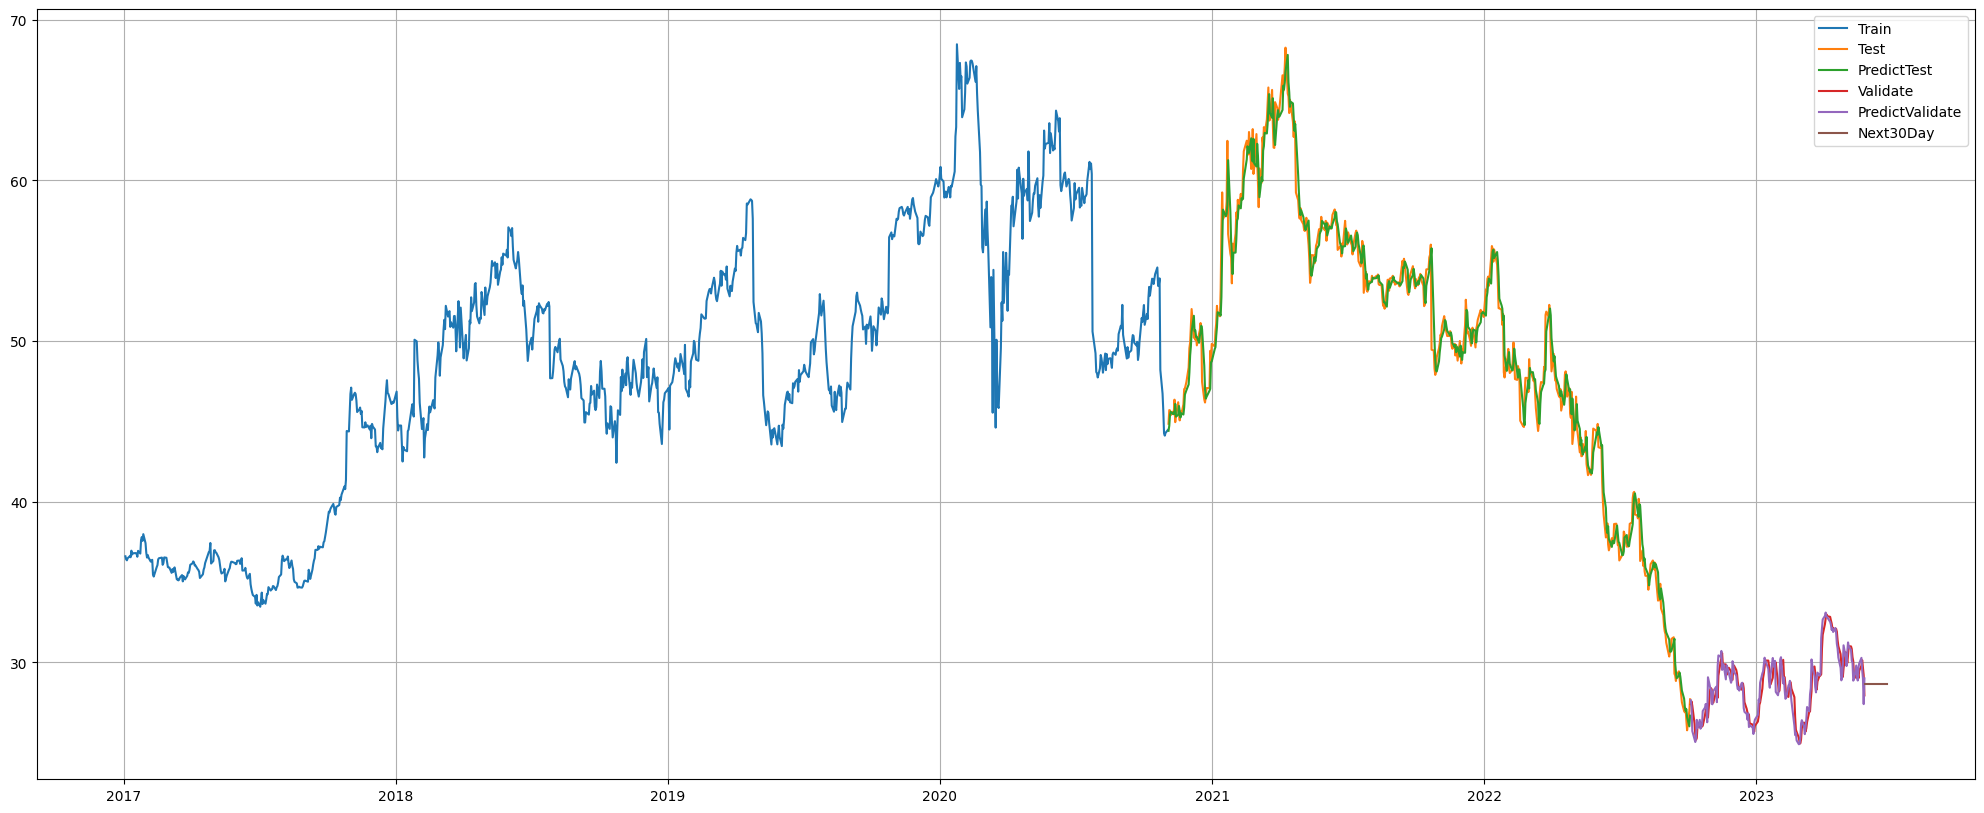

In [13]:
# Drawing
plt.figure(figsize=(25, 10))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])

plt.grid()
# plt.savefig('SES_AMD.png')
plt.show()

In [14]:
test_mse = mean_squared_error(test_data, y_pred)
print(test_mse)

1.203428337611628
